# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

import joblib

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut
df = pd.read_csv("data_clustering_inverse.csv")

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,TransactionDate,PreviousTransactionDate,BinningAge,Target
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,2023-04-11 16:29:14,2024-11-04 08:08:08,High,1
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,2023-06-27 16:44:19,2024-11-04 08:09:35,High,0
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,2023-07-10 18:16:08,2024-11-04 08:07:04,Very Low,2
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,2023-05-05 16:32:11,2024-11-04 08:09:06,Very Low,0
4,13.45,45.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,2023-10-16 17:51:24,2024-11-04 08:06:39,Medium,0


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
categorical_cols = df.select_dtypes(include=['object']).columns

for column in categorical_cols:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])

x = df.drop(columns=['Target'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [5]:
# Buatlah model klasifikasi menggunakan Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
# Menyimpan Model
# import joblib
joblib.dump(model, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [7]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


==== Decision Tree Classifier ====
Accuracy: 0.9759
Precision: 0.9760
Recall: 0.9759
F1-Score: 0.9758

----------------------------------------



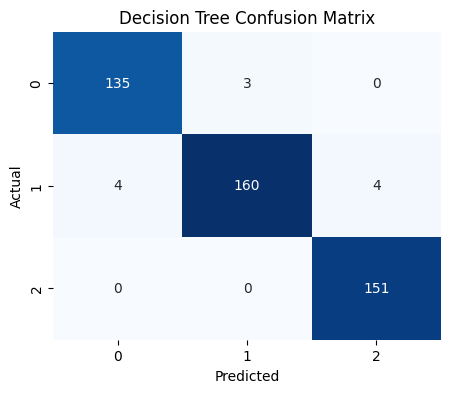


----------------------------------------

==== Random Forest Classifier ====
Accuracy: 0.9803
Precision: 0.9808
Recall: 0.9803
F1-Score: 0.9803

----------------------------------------



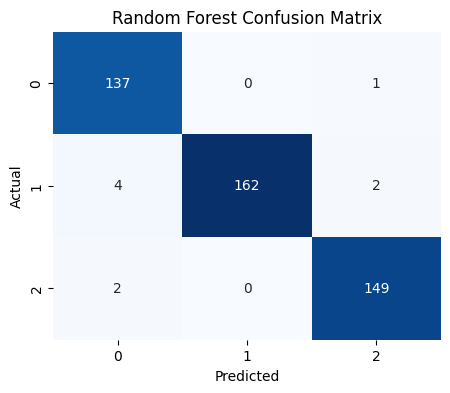

In [8]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
y_pred_dt = model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("==== Decision Tree Classifier ====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='weighted'):.4f}")

print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\n" + "-"*40 + "\n")

y_pred_rf = model_forest.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("==== Random Forest Classifier ====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
joblib.dump(model_forest, 'explore_random_forest_classification.h5')

['explore_random_forest_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [10]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.
param_dist = {
    'n_estimators': np.linspace(100, 500, 5, dtype=int),
    'max_depth': np.linspace(10, 50, 5, dtype=int),
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(estimator=model_forest, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print(f"Best parameters (Random Search): {random_search.best_params_}")
best_rf_random = random_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters (Random Search): {'n_estimators': np.int64(200), 'min_samples_split': 5, 'max_depth': np.int64(50), 'criterion': 'entropy'}


==== Random Search Hyperparameter tuning ====
Accuracy: 0.9825
Precision: 0.9827
Recall: 0.9825
F1-Score: 0.9825

----------------------------------------



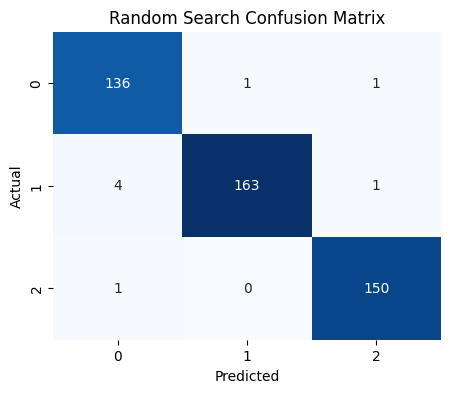

In [11]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
y_pred_rs = best_rf_random.predict(X_test)
cm_rs = confusion_matrix(y_test, y_pred_rs)

print("==== Random Search Hyperparameter tuning ====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rs):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rs, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rs, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rs, average='weighted'):.4f}")

print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rs, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Search Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
# Menyimpan Model hasil tuning
# import joblib
joblib.dump(best_rf_random, 'tuning_classification.h5')

['tuning_classification.h5']

End of Code